In [85]:
using ModelingToolkit, DifferentialEquations, Random, Distributions, Plots, CSV, DataFrames

include("Functions.jl")


flux_vector (generic function with 2 methods)

In [210]:
C_ATP = exp(-5.643)*1000 #M to mM
C_ADP = exp(-6.616)*1000 
C_cit = exp(-3.930)*1000
C_AMP = exp(-12.151)*1000
C_PFKM = 4*10^-5
C_AMPK = 5.7875*10^-5 #WT: 5.7875*10^-5 and Zela: 6.8275*10^-5
C_Pi = 1
C_G6P = exp(-7.762)*1000 
C_GAP = exp(-15.059)*1000 
C_DHAP = exp(-13.059)*1000

L_PFKM = 2*10^-3
L_PFK2 = 1*10^-3

Vf_GPI = 4.8*10^4
Vr_GPI = 4.0*10^4 # Changed from 40 to 4.0
Vf_PFK2 = 41.6
Vr_PFK2 = 4 #
Vf_FBP = 11.78 
Vr_FBP = 1.2 #
Vf_ALD = 6.75*10^2
Vr_ALD = 2.32*10^3

Kf_GPI = 0.3
Kr_GPI = 0.123
Ki_ATP = 0.1
Ki_cit = 0.1 #
Ka_f6p = 6*10^-2
Ka_f16bp = 0.35 #0.35 for PFKM and 0.65 for PFKL
Ka_AMP = 0.3
Ka_f26bp = 5.5*10^-8 # 5.5*10^-3
Kcf_PFKM = 15.5*10^2/4*10^-5 #
Kcr_PFKM = 6.78*10^1/4*10^-5 #
K_f6p = 6*10^-2
K_ATP = 6.8*10^-2
K_f16bp = 0.65
K_ADP = 0.54
K_cat = 0.1
v_P = 0.005
K2_ATP = 0.15
K2_f6p = 0.032
K2_f26bp = 0.008
K2_ADP = 0.062
K_FBP_f26bp = 1*10^-3
K_FBP_f6p = 25*10^-3
K_Pi = 0.23 #
KAld_f16bp = 5*10^-2
K_GAP = 0.189
K_DHAP = 3.5*10^-2

f6p_obs = exp(-7.776)*1000
f16bp_obs = exp(-8.215)*1000
f26bp_est = exp(-10)*1000

@variables t f6p(t) f16bp(t) f26bp(t)
#=
f6p = f6p_obs
f16bp = f16bp_obs
f26bp = f26bp_est
=#
print("obs =[",f6p_obs, " ", f16bp_obs, " ", f26bp_est ,"]")

obs =[0.4196875718701129 0.2705645110341627 0.04539992976248485]

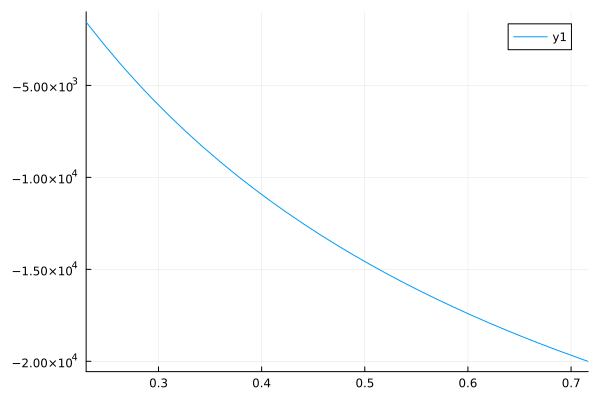

In [211]:
r_GPI_01(f6p_1) = (Vf_GPI*C_G6P/Kf_GPI - Vr_GPI*f6p_1/Kr_GPI)/
    (1 + C_G6P/Kf_GPI + f6p_1/Kr_GPI)

plot(r_GPI_01, xlims=(exp(-8.378)*1000, exp(-7.241)*1000))



In [219]:
C_G6P = exp(-7.762)*1000 #0.4256
#C_G6P = 0.7647 # mM


Vf_GPI = 4.8*10^4
Vr_GPI = 3.5*10^4 # 4*10^4. 3.5*10^4 with Kr_GPI=0.123 gives 1306

Kf_GPI = 0.3
Kr_GPI = 0.123 # 0.132 with 4*10^4 gives 350 

f6p = 0.22 # mM 3% quantile
K_eq = Vf_GPI*Kr_GPI/(Vr_GPI*Kf_GPI)
#K_eq = 0.55

r_GPI = (Vf_GPI*C_G6P/Kf_GPI - Vr_GPI*f6p/Kr_GPI)/
    (1 + C_G6P/Kf_GPI + f6p/Kr_GPI)

r_GPI_eq = (Vf_GPI/Kf_GPI)*(C_G6P-(f6p/K_eq))/(1 + C_G6P/Kf_GPI + f6p/Kr_GPI)

(Vf_GPI*C_G6P/Kf_GPI)/(1 + C_G6P/Kf_GPI + f6p/Kr_GPI);

print(r_GPI_eq, " ", r_GPI)


1306.0864830933663 1306.0864830933676

Increasing Kr_GPI or decreasing Vr_GPI provides a higher rate

In [217]:
r_GPI_fun(g6p, f6p) = (Vf_GPI/Kf_GPI)*(g6p-(f6p/K_eq))/(1 + g6p/Kf_GPI + f6p/Kr_GPI)


r_GPI_fun (generic function with 1 method)

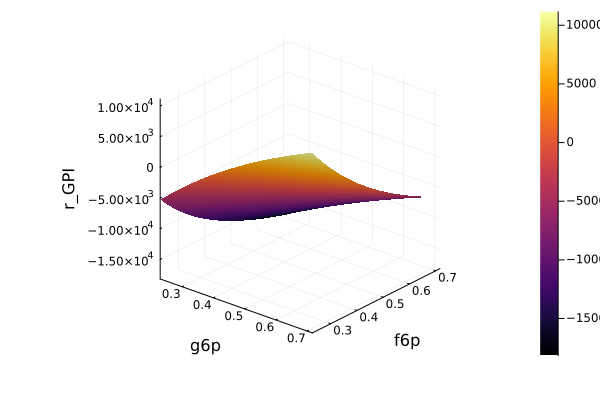

In [218]:
g6ps = range(exp(-8.378)*1000, stop = exp(-7.241)*1000, length=100)
f6p1s = range(exp(-8.378)*1000, stop = exp(-7.241)*1000, length=100)
surface(g6ps, f6p1s, r_GPI_fun, camera = (40,25), xlabel = ("g6p"), ylabel = ("f6p"), zlabel = "r_GPI")

In [93]:

P_eq_S_eq = exp(-7.776)*1000/(exp(-7.762)*1000)

(exp(-7.762)*1000)-exp(-7.776)*1000/(Vf_GPI*Kr_GPI/(Vr_GPI*Kf_GPI))

-0.4274190001920857

In [233]:
f6p = 0.22 
f16bp = exp(-9.772)*1000 # 0.057 mM
f26bp = exp(-10)*1000 # 0.0453 mM

C_ATP = exp(-5.643)*1000 # 3.5422 mM
C_ADP = exp(-6.616)*1000 # 1.3388 mM
C_PFKM = 4*10^-5
Kcf_PFKM = 15.5*10^2/C_PFKM # 4*10^-5
Kcr_PFKM = 6.78*10^1/C_PFKM # 4*10^-5
K_f6p = 6*10^-2
K_ATP = 6.8*10^-2
K_f16bp = 0.65
K_ADP = 0.54

Vf_PFKM = 15.5*10^2
Vr_PFKM = 6.78*10^1
Keq_PFKM = Kcf_PFKM*K_ATP*K_f16bp/(Kcr_PFKM*K_f6p*K_ATP)
#Keq_PFKM = 1300

N_PFKM = 1 + L_PFKM*(1 + C_ATP/Ki_ATP)^4*(1 + C_cit/Ki_cit)^4/
    ((1 + f6p/Ka_f6p + f16bp/Ka_f16bp)^4 * (1 + C_AMP/Ka_AMP)^4 * (1 + f26bp/Ka_f26bp)^4)

r_PFKM = C_PFKM*((Kcf_PFKM*C_ATP*f6p/(K_f6p*K_ATP) - Kcr_PFKM*C_ADP*f16bp/(K_f16bp*K_ADP))/
    ((1 + f6p/K_f6p)*(1 + C_ATP/K_ATP) + (1 + f16bp/K_f16bp)*(1 + C_ADP/K_ADP) -1))*
    (1/N_PFKM)

r_PFKM_eq = ((C_PFKM*(Kcf_PFKM/(K_f6p*K_ATP))*(C_ATP*f6p - C_ADP*f16bp/Keq_PFKM))/
    ((1 + f6p/K_f6p)*(1 + C_ATP/K_ATP) + (1 + f16bp/K_f16bp)*(1 + C_ADP/K_ADP) -1))*
    (1/N_PFKM)
print(1/N_PFKM, " ", r_PFKM_eq, " ", r_PFKM )


0.9999999999999802 1181.171087807378 1181.5796440713382

In [234]:
print(Keq_PFKM)

247.6647000983284

In [235]:
((1 + f6p/K_f6p)*(1 + C_ATP/K_ATP) + (1 + f16bp/K_f16bp)*(1 + C_ADP/K_ADP) -1)

250.54504630574667

In [236]:
(C_PFKM*(Kcf_PFKM/(K_f6p*K_ATP))*(C_ATP*f6p - C_ADP*f16bp/Keq_PFKM))

295936.56488971453

In [ ]:
psi = (K_cat*C_AMPK)/((K_cat*C_AMPK)+v_P)
N_PFK2 = 1 + L_PFK2*(psi/(1-psi))^2


In [ ]:
r_PFK2 = ((Vf_PFK2*C_ATP*f6p)/(K2_ATP*K2_f6p) - (Vr_PFK2*C_ADP*f26bp)/(K2_f26bp*K2_ADP)) / 
    ((1+f6p/K2_f6p)*(1+C_ATP/K2_ATP) + (1+f26bp/K2_f26bp)*(1+C_ADP/K2_ADP) -1) *
    (1-(1/N_PFK2))


In [ ]:
r_FBP = ((Vf_FBP*f26bp)/(K_FBP_f26bp) - (Vr_FBP*C_Pi*f6p)/(K_Pi*K_FBP_f6p))/
    ((1+f26bp/K_FBP_f26bp) + (1+f6p/K_FBP_f6p)*(1+C_Pi/K_Pi)-1) * 
    (1/N_PFK2)



In [ ]:
r_ALD = ((Vf_ALD*f16bp)/(KAld_f16bp) - (Vr_ALD*C_GAP*C_DHAP)/(K_GAP*K_DHAP))/ 
    ((1 + f6p/KAld_f16bp) + (1 + C_GAP/K_GAP)*(1 + C_DHAP/K_DHAP) -1)


In [ ]:
@variables t f6p(t) f16bp(t) f26bp(t)
D = Differential(t)

eqs = [D(f6p) ~ r_GPI - r_PFKM - r_PFK2 + r_FBP,
    D(f16bp) ~ r_PFKM - r_ALD,
    D(f26bp) ~ r_PFK2 - r_FBP]

@named sys = ODESystem(eqs, t)

sys=structural_simplify(sys)


[0.02093974237753042, 1.5963651534986457e-5, 0.0003709705712723864]

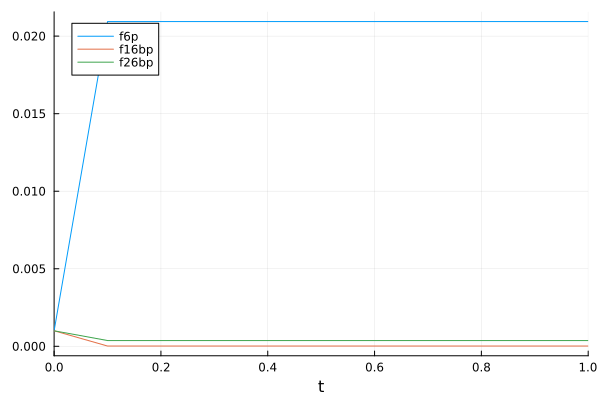

In [11]:
u0 = [f6p => 1*10^-3,
    f16bp => 1*10^-3,
    f26bp => 1*10^-3]
tspan = (0.0, 100)
prob = ODEProblem(sys, u0, tspan, jac = true)
sol = solve(prob, Rodas4())
print(sol[end])
ss = sol[end]
plot(sol,
    xlim = (0.000, 1))

In [12]:
u0 = [f6p => 1*10^-3,
    f16bp => 1*10^-3,
    f26bp => 1*10^-3]

#=
Random.seed!(1231)
Cons = [C_ATP => rand(LogNormal(-5.643, 0.166),1)[]*1000, #M to mM
    C_ADP => rand(LogNormal(-6.616, 0.169),1)[]*1000, 
    C_cit => rand(LogNormal(-3.930, 0.225),1)[]*1000,
    C_AMP => rand(LogNormal(-12.151, 0.274),1)[]*1000,
    C_PFKM => 4*10^-5,
    C_AMPK => 5.7875*10^-5, #WT: 5.7875*10^-5 and Zela: 6.8275*10^-5
    C_Pi => 1, 
    C_G6P => rand(LogNormal(-7.762, 0.314),1)[]*1000, 
    C_GAP => rand(LogNormal(-15.059, 0.165),1)[]*1000, 
    C_DHAP => rand(LogNormal(-13.059, 0.165),1)[]*1000, 
    ]
=#
Cons = [C_ATP, #M to mM
    C_ADP, 
    C_cit,
    C_AMP,
    C_PFKM,
    C_AMPK, #WT: 5.7875*10^-5 and Zela: 6.8275*10^-5
    C_Pi, 
    C_G6P,
    C_GAP, 
    C_DHAP]

L = [L_PFKM,
    L_PFK2]

V = [Vf_GPI,
    Vr_GPI,
    Vf_PFK2,
    Vr_PFK2,
    Vf_FBP,
    Vr_FBP,
    Vf_ALD,
    Vr_ALD]

K = [Kf_GPI,
    Kr_GPI,
    Ki_ATP,
    Ki_cit,
    Ka_f6p,
    Ka_f16bp,
    Ka_AMP,
    Ka_f26bp,
    Kcf_PFKM,
    Kcr_PFKM,
    K_f6p,
    K_ATP,
    K_f16bp,
    K_ADP,
    K_cat,
    v_P,
    K2_ATP,
    K2_f6p,
    K2_f26bp,
    K2_ADP,
    K_FBP_f26bp,
    K_FBP_f6p,
    K_Pi, #
    KAld_f16bp,
    K_GAP,
    K_DHAP] 

p= [Cons 
    L 
    V 
    K]

flux_vector(u0,p)

6-element Vector{Float64}:
 26720.11495879696
     2.3828546242314215e-9
     5.354429836807767e-10
     1.7634508325167237
    12.272052707002596
     1.5499345420603872e-7

In [8]:
function flux_vector01(u)
    if typeof(u) == Vector{Pair{Num, Float64}}
        u_01 = zeros(length(u))
        for i in 1:length(u)
            u_01[i] = u[i][2]
        end
    else
        u_01 = u
    end 
    
    f6p, f16bp, f26bp = u_01

    r_GPI = (Vf_GPI*C_G6P/Kf_GPI - Vr_GPI*f6p/Kr_GPI)/(1 + C_G6P/Kf_GPI + f6p/Kr_GPI)

    N_PFKM = 1 + L_PFKM*(1 + C_ATP/Ki_ATP)^4*(1 + C_cit/Ki_cit)^4/
        ((1 + f6p/Ka_f6p + f16bp/Ka_f16bp)^4 * (1 + C_AMP/Ka_AMP)^4 * (1 + f26bp/Ka_f26bp)^4)

    r_PFKM = C_PFKM*((Kcf_PFKM*C_ATP*f6p/(K_f6p*K_ATP) - Kcr_PFKM*C_ADP*f16bp/(K_f16bp*K_ADP))/
        ((1 + f6p/K_f6p)*(1 + C_ATP/K_ATP) + (1 + f16bp/K_f16bp)*(1 + C_ADP/K_ADP) -1))*
        (1/N_PFKM)

    psi = (K_cat*C_AMPK)/((K_cat*C_AMPK)+v_P)
    N_PFK2 = 1 + L_PFK2*(psi/(1-psi))^2

    r_PFK2 = ((Vf_PFK2*C_ATP*f6p)/(K2_ATP*K2_f6p) - (Vr_PFK2*C_ADP*f26bp)/(K2_f26bp*K2_ADP)) / 
        ((1+f6p/K2_f6p)*(1+C_ATP/K2_ATP) + (1+f26bp/K2_f26bp)*(1+C_ADP/K2_ADP) -1) *
        (1-(1/N_PFK2))

    r_FBP = ((Vf_FBP*f26bp)/(K_FBP_f26bp) - (Vr_FBP*C_Pi*f6p)/(K_Pi*K_FBP_f6p))/
        ((1+f26bp/K_FBP_f26bp) + (1+f6p/K_FBP_f6p)*(1+C_Pi/K_Pi)-1) * 
        (1/N_PFK2)

    r_ALD = ((Vf_ALD*f16bp)/(KAld_f16bp) - (Vr_ALD*C_GAP*C_DHAP)/(K_GAP*K_DHAP))/ 
        ((1 + f6p/KAld_f16bp) + (1 + C_GAP/K_GAP)*(1 + C_DHAP/K_DHAP) -1)

    f6p_flux = r_GPI - r_PFKM - r_PFK2 + r_FBP
    f16bp_flux = r_PFKM - r_ALD
    f26bp_flux = r_PFK2 - r_FBP

    return[f6p_flux, f16bp_flux, f26bp_flux
    ]
end 

flux_vector01 (generic function with 1 method)

In [13]:
flux_vector01(sol[end])

3-element Vector{Float64}:
  2.1214452098703154e-12
  1.513760373306742e-18
 -4.2040314778123534e-17